# Projet numérique de probabilités 

## Préambule

Dans ce projet, on va chercher à développer un algorithme permettant de générer des textures aléatoires reprenant certaines caractéristiques du mouvement brownien.
Dans un premier temps, on va s'intéresser à construire le mouvement brownien en une dimension comme limite d'une marche aléatoire. On verra ensuite une construction alternative qui permettra de conserver certaines de ses propriétés puis on la généralisera à 2 dimensions.


# Marche aléatoire

Soit $(X_i)_{i\in \mathbb{N}^\ast}$ une suite de variables aléatoires indépendantes telle que :

$$\mathbb{P}(X_i=x) = \left\{\begin{array}{ll}
\frac{1}{2} & \text{ si } x=1\\
\frac{1}{2} & \text{ si } x=-1\\
\end{array}\right.
\forall i\geq 1$$

On considère la suite $(Y_n)_{n \in \mathbb{N}}$, où $Y_0 = 0$ et 
$$Y_n=\sum_{i=1}^{n}X_i$$


1. Calculer l'espérance et la variance de $X_i$.
2. En déduire l'espérance et la variance de $Y_n$.
3. Montrer que $\forall n \in \mathbb{N}$, $\mathbb{P}_{Y_n|Y_{n-1} = y_{n-1}, \ldots, Y_{0} = y_{0}} = \mathbb{P}_{Y_n|Y_{n-1} = y_{n-1}}$. On dit que la suite $(Y_n)_{n \in \mathbb{N}}$ possède la propriété de Markov.
4. Montrer que $\mathrm{Cov}(Y_n,Y_{n'}) = \min(n,n')$ puis que $\frac12\mathbb{E}\left((Y_n-Y_{n+h})^2\right) = h/2$, pour $h>0$. Cette dernière quantité s'appelle le variogramme de $Y_n$ et peut s'interpréter comme une quantification de sa régularité.
5. Utiliser le théorème central limite pour montrer que
  $$\frac{Y_n}{\sqrt{n}}\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1),$$


**Réponse :**

*Question 1 :* $$ \forall i \in \mathbb{N}^*, \mathbb{E}(X_i)=\frac{1}{2} \times 1 + \frac{1}{2}\times (-1) = 0 $$ et $$ \mathbb{V}(X_i)=\mathbb{E}(X_i^2) = \frac{1}{2} + \frac{1}{2} = 1 $$

*Question 2 :* On en déduit que $ \forall n \in \mathbb{N}, \mathbb{E}(Y_n)=0 \text{ et } \mathbb{V}(Y_n) = \left\{\begin{array}{ll}
n & \text{ si } n \geq 1\\
0 & \text{ si } n=0\\
\end{array}\right. $

*Question 3 :*
$ \forall k \in \mathbb{Z} , \mathbb{P} (Y_n=k \mid Y_{n-1}=y_{n-1} ,\dots, Y_2=y_2 , Y_1=y_1, Y_0=y_0) = \dfrac{\mathbb{P}(Y_n=k, Y_{n-1}=y_{n-1}, \dots, Y_2=y_2 , Y_1=y_1, Y_0=y_0)}{\mathbb{P}(Y_{n-1}=y_{n-1}, \dots, Y_2=y_2 , Y_1=y_1, Y_0=y_0)} = \dfrac{\mathbb{P}(X_n=k-y_{n-1}, X_{n-1}=y_{n-1}-y_{n-2}, \dots, X_2=y_2-y_1 , X_1=y_1, 0=y_0)}{\mathbb{P}(X_{n-1}=y_{n-1}-y_{n-2}, \dots, X_2=y_2-y_1 , X_1=y_1, 0=y_0)} = \mathbb{P}(X_n=k-y_{n-1}) \text{ par indépendance.} $

De même,
$ \mathbb{P}(Y_n=k \mid Y_{n-1})= \mathbb{P}(Y_n=k-y_{n-1}) $

Conclusion :
$ \forall n \in \mathbb{N} $, $ \mathbb{P}_{Y_n|Y_{n-1} = y_{n-1}, \ldots, Y_{0} = y_{0}} = \mathbb{P}_{Y_n|Y_{n-1} = y_{n-1}} $

*Question 4 :*
$$ Cov(Y_n,Y_n')= \mathbb{E}(Y_nY_n') - \underbrace{\mathbb{E}(Y_n) \mathbb{E}(Y_n')}_{=0} = \sum_{i=1}^n \sum_{j=1}^{n'} \mathbb{E}(X_iX_j) = \sum_{i \neq j} \underbrace{\mathbb{E}(X_i) \mathbb{E}(X_j)}_{=0} + \sum_{k=1}^{min(n,n')} \underbrace{\mathbb{E}(X_k^2)}_{=1} = min(n,n') $$
On a aussi que : $$ \mathbb{E}( (Y_n-Y_{n+h})^2 ) = \mathbb{E}( Y_n^2 + Y_{n+h}^2 -2Y_nY_{n+h}) = n + n+h -2Cov(Y_n,Y_{n+h})=2n+h-2n=h $$
Conclusion : $$\frac{1}{2} \mathbb{E}( (Y_n-Y_{n+h})^2 ) = \frac{h}{2} $$

*Question 5:*
Les variables aléatoires $X_i$ sont de carré intégrable et indépendantes et identiquement distribuées, on peut donc appliquer le théorème de la limite centrale :
$$ \dfrac{ Y_n - \mathbb{E}(Y_n) }{ \sqrt{n} \times 1 } = \dfrac{Y_n}{ \sqrt{n} } \text{ converge en loi vers une variable aléatoire de loi } \mathcal{N}(0,1) $$


In [1]:
# chargement de dépendances
%pylab inline
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Initialisation de la graine
np.random.seed(1234)

# Comportement asymptotique

On introduit maintenant $t_i=\frac{i}{n}, i=0,\ldots,n$ et
$$Z^{(n)}_t= \frac{Y_{[nt]}}{\sqrt{n}}, t\in[0,1],$$
où $[\cdot]$ est la partie entière.

1. Montrer que $\bigcup_{i=0}^{n-1}(t_i,t_{i+1}]$ forme une partition de $(0,1]$.

2. Montrer que $Z^{(n)}_t=Z^{(n)}_{t_i}$ pour $i=[nt]$.

3. Par conséquent, $Z^{(n)}_t, t\in[0,1]$ est bien défini $\forall t \in [0,1]$. Implémenter un algorithme pour simuler $Z^{(n)}_t$ aux points $t_i,~ i \in\{0,\ldots,n\}$. Représenter une trajectoire pour $n$=1000.



**Question 1 :**
Très clairement, $\forall i,j \in [\![0,n]\!],i \neq j, ]t_i,t_{i+1}] \cap ]t_j,t_{j+1}] = \emptyset  $
Montrons que : $$ \bigcup^{n-1}_{i=0}]t_i,t_{i+1}]=]0,1] $$
L'inclusion directe est immédiate.

Inclusion réciproque :
Soit $t\in ]0,1]$, Posons $i= -[1-nt]$ entier de $[\![0,n-1]\!]$ , on a donc $ i \lt nt \leqslant i+1 $ et $ t_i \lt t \leqslant t_{i+1}$ D'où l'inclusion réciproque

Ainsi les intervalles $(]t_i,t_{i+1}])_{0\leqslant i \leqslant n-1}$ forment une partition de ]0,1].

**Question 2 :**
$[nt_i]=[\dfrac{n[nt]}{n}]=[ [nt] ] = [nt].$ D'où $ Y_{[nt]}=Y_{[nt_i]}$ et ainsi $Z^{(n)}_t=Z^{(n)}_{t_i}$


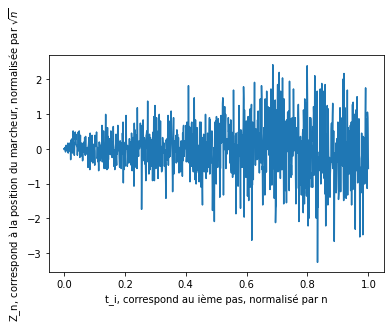

In [13]:
#Question 3:

def X(): #Ne sert à rien car lent
    return(np.random.choice(np.array([-1,1]) ) )

def Y(n): #Ce que j'ai fait revient à la vectoriser, il faut juste lui fournir un array ou une liste, même si qu'un nombre.
    #Ce array correspond à tous les Y_ni qu'on veut où les ni sont les éléments de l'array. Retourne le tableau correspondant 
    
    final=np.zeros( (n.shape[0],)) #AR POOUR EVITER LA DOUBLE BOUCLE FOR, PRENDRE EXEMPLE SUR Z TIL
    for j in range(n.shape[0]): #Je suis obligé de faire une boucle for et je peut pas directement faire un np.choice dans un tableau
        #à 2 dimension car dans le tableau n, les ni voulu diffèrent.
        final[j]=np.random.choice(np.array([-1,1]),size=( int(n[j]) , )).sum()
    return(final)

def Z(n,i):
    ti=i/n
    return(Y(np.floor(n*ti))/np.sqrt(n))

n=1000
x=np.arange(0,n+1,1)/n
y=Z(n,x*n)

plt.plot(x,y);
plt.xlabel("t_i, correspond au ième pas, normalisé par n")
plt.ylabel(f"Z_n, correspond à la position du marcheur, normalisée par $\sqrt{{n}}$")
plt.show()


4. Montrer que $Z^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,t),~\forall t \in [0,1]$, en déduire la loi de $Z^{(n)}_1=\frac{Y_n}{\sqrt{n}}$ quand $n$
  tend vers l'infini.
  Construire un échantillon de taille 1000 de valeurs de $Z^{(n)}_1$ pour n = 1000. Représenter son histogramme et le comparer avec la densité gaussienne standard.



**Question 4 :**
Pour tout $t \in [0,1]$, il existe $i \in [\![0,n]\!]$ tel que $Z^{(n)}_t=Z^{(n)}_{t_i}=\frac{Y_i}{\sqrt{n}}= \frac{Y_{[nt]}}{\sqrt{n}}$

Or, $$\dfrac{Y_{[nt]}}{\sqrt{[nt]}} \text{ converge en loi vers X qui suit } \mathcal{N}(0,1) $$
Cela signifie que, pour toute fonction $f$ continue et bornée de $\mathbb{R}$ dans $\mathbb{R}$, on a : $$ \mathbb{E} \left( f \left( \dfrac{Y_{[nt]}}{\sqrt{[nt]}} \right) \right) \underset{n\to +\infty}{\longrightarrow} \mathbb{E}(f(X)) $$
Montrons que, pour toute fonction $f$ continue bornée, on a : $$\mathbb{E} \left( f \left( \dfrac{Y_{[nt]}}{\sqrt{nt}} \right) \right) \underset{n\to +\infty}{\longrightarrow} \mathbb{E}(f(X)) $$

Soit $f$ continue bornée et $\epsilon \gt 0$.
Il existe $N\in \mathbb{N}$ à partir duquel $$ \vert \mathbb{E} \left( f \left( \dfrac{Y_{[nt]}}{\sqrt{[nt]}} \right) \right) - \mathbb{E}(f(X)) \vert \leqslant \epsilon $$ 

On a donc,

$
\begin{align} 
  \vert \mathbb{E} \left( f \left( \dfrac{Y_{[nt]}}{\sqrt{nt}} \right) \right) - \mathbb{E}(f(X)) \vert & \leqslant \left \lvert \mathbb{E} \left( f \left( \dfrac{Y_{[nt]}}{\sqrt{[nt]}} \right) \right) - f \left( \dfrac{Y_{[nt]}(\omega)}{\sqrt{nt}} \right) \right \rvert + \epsilon \\ 
  &\leqslant \int_{\mathbb{\Omega}} \left \lvert f \left( \dfrac{Y_{[nt]}(\omega)}{\sqrt{nt}} \right) -  f \left( \dfrac{Y_{[nt]}(\omega)}{\sqrt{[nt]}} \right) \right \rvert d\mathbb{P}(\omega) + \epsilon \\  
\end{align}$

Or, $[nt] \sim nt$ quand n tend vers $+\infty $.

D'où, $\forall \omega \in \Omega$, $f \left( \dfrac{Y_{[nt]}(\omega)}{\sqrt{nt}} \right) \sim f \left( \dfrac{Y_{[nt]}(\omega)}{\sqrt{[nt}]} \right)$

Ainsi, $$\forall \epsilon \gt 0, \forall \omega \in \Omega, \text{ Il existe } N_{\epsilon , \omega } \in \mathbb{N} \text{ tel que } \forall n \geqslant N_{\epsilon , \omega }, \left \lvert  f \left( \dfrac{Y_{[nt]}(\omega)}{\sqrt{nt}} \right) - f \left( \dfrac{Y_{[nt]}(\omega)}{\sqrt{[nt]}} \right) \right \rvert \leqslant \epsilon \left \lvert f \left( \dfrac{Y_{[nt]}(\omega)}{\sqrt{[nt]}} \right) \right \rvert $$

On applique la définition précédente au $\epsilon$ fixé et on note $N' = max( max_{ \omega } (N_{ \epsilon ,\omega }) , N)$.
Ainsi, on a, pour tout $n \geqslant N'$,
$\begin{align}
\vert \mathbb{E} \left( f \left( \dfrac{Y_{[nt]}}{\sqrt{nt}} \right) \right) - \mathbb{E}(f(X)) \vert & \leqslant \epsilon \int_{\mathbb{R}} \left \lvert f \left( \dfrac{Y_{[nt]}(\omega)}{\sqrt{[nt]}} \right) \right \rvert d\mathbb{P}(\omega ) + \epsilon \\
& \underset{ \text{A partir certain rang } N''}{\leqslant} \epsilon( C +1) \\
\end{align}$
A REVOIR LE C ET COMMENT BIEN JUSITIFER PROPREMENT QUE C'EST BORNE QUAND N TEND VERS PLUS INF. 

Ainsi, $$  \dfrac{Y_{[nt]}}{\sqrt{nt}}  \text{ Converge en loi vers } X$$
Et donc, $$ Z_t^{(n)} = \dfrac{Y_{[nt]}}{\sqrt{n}} \text{ converge en loi vers } \sqrt{t}X \text{ qui suit une loi } \mathcal{N}(0,t) $$
On en déduit que $Z_1^{(n)}$ converge en loi vers $\mathcal{N}(0,1)$

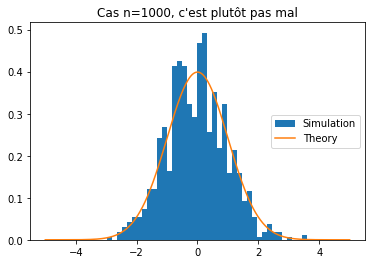

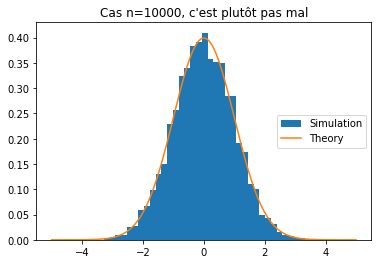

C'est plutôt pas mal pour n=1000 , pour n=10000 ça reste très rapide et ça suit encore mieux la théorie


In [95]:
#Question 4 suite :

def trace_traject_Z(n, taille, kwarg={'bins':40}):
    N=np.full( (taille,),n)
    Z_tot= Z(n, N) #On simule Z 1000 fois pour t=1=n/n. Plutôt que de faire une boucle for, on lui envoie un tableau avec tous les temps
    #qu'il doit simuler.
    plt.hist(Z_tot,**kwarg, label="Simulation", density=True) #Density divise par Z_tot.shape[0] pour normaliser
    
    #Tracé de la densité gaussienne :
    x = np. linspace (-5,5,1000)
    f_x = sps.norm.pdf(x) #Densite exponentielle
    plt.title(f"Cas n={n}, c'est plutôt pas mal")
    plt.plot(x,f_x,label="Theory")
    plt.legend(loc="right");
    plt.show()

trace_traject_Z(1000,1000)
trace_traject_Z(10000,10000)

print("C'est plutôt pas mal pour n=1000 , pour n=10000 ça reste très rapide et ça suit encore mieux la théorie")

**Remarque**

${\bf Z}_t=\lim_{n \to \infty} Z^{(n)}_t$ est le mouvement brownien standard sur $[0,1]$. 


# Une construction alternative

On considère maintenant la construction suivante, définie pour tout $t \in [0,1]$:
$$\tilde{Z}^{(n)}_t = \frac{1}{\sqrt{n}}\sum_{i=1}^n X_i (1_{[0,U_i]}(t)-1_{]U_i,1]}(t))$$
où les $X_i$ sont définis tels que précédemment et les $U_i$ sont des variables aléatoires i.i.d. de loi uniforme sur $[0,1]$.
Cette construction permet de définir un algorithme alternatif de simulation d'une (approximation de) trajectoire brownienne, cette fois-ci non standard au sens où on n'a pas systématiquement $\tilde{Z}^{(n)}_0 = 0$.

1. Discrétiser l'intervalle $[0,1]$ en 1000 points de manière régulière et implémenter l'algorithme (commencer par n = 1). Représenter une trajectoire pour $n = 1000$.

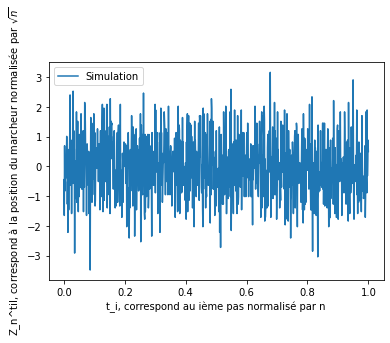

In [64]:
def U(): #Ne sert à rien car oblige à faire boucle for, sinon il faudrait lui mettre un argument size mais flemme
    return(sps.uniform.rvs())

def Z_til(n,t): #On la vectorise de manière à ce qu'on puisse mettre une liste pour t
    
    S=np.zeros((t.shape[0],))
    

    
    for k in range(1,n+1):
        valeurs=sps.uniform.rvs(size=(t.shape[0],))
        changes=np.random.choice(np.array([-1,1]), size=(t.shape[0],) )

        #tab_1 = t[t <= valeurs] #On sélectionne juste les valeurs qui sont <= aux correspondantes
        S_change1=S[t<=valeurs] #On va agir par effet de bord, car on parle en vue, S_change est une vue de S, changer S_change changeS
        S[t<=valeurs]=S_change1 + changes[t<=valeurs]

        #tab_2 = t[t > valeurs] #On sélectionne juste les valeurs qui sont <= aux correspondantes
        S_change2=S[t>valeurs] #On va agir par effet de bord, car on parle en vue, S_change est une vue de S, changer S_change changeS
        S[t>valeurs]=S_change2 - changes[t>valeurs]
            

    return(S/np.sqrt(n))

#Tracé de la trajectoire :
n=1000
x=np.linspace(0,1,1000)
y=Z_til(n,x)

plt.plot(x,y,label="Simulation");
plt.xlabel("t_i, correspond au ième pas normalisé par n")
plt.ylabel(f"Z_n^til, correspond à la position du marcheur normalisée par $\sqrt{{n}}$")
plt.legend()
plt.show()


In [6]:
t=np.array([0.3,0.5,0.6])
valeurs=np.array([0.1,0.6,0.55])
print(t[t<= valeurs])
print( t<= valeurs)
tab_bool=np.array([True,False])
S=np.array([0.1,0.2,0.4])
print(S[t<=valeurs])

[0.5]
[False  True False]
[0.2]


In [8]:
sps.uniform.rvs(size=(10,))

array([0.88517649, 0.62162433, 0.83004125, 0.13190592, 0.40400028,
       0.22677541, 0.67359763, 0.34729912, 0.93472102, 0.71864284])

2. Calculer l'espérance et la variance de $\tilde{Z}^{(n)}_t$. En déduire que $\forall t \in [0,1],~ \tilde{Z}^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1)$. Le vérifier expérimentalement aux points $\{0,0.25,0.5,0.75,1\}$ sur la base d'un échantillon de 1000 réalisations de $\tilde{Z}^{(n)}$.

**Question 2 :**
$\mathbb{E}( \tilde{Z}^{(n)}_t) = \frac{1}{\sqrt{n}} \sum_{i=1}^{n} \mathbb{E}(X_i) \mathbb{E}(1_{[0,U_i]}(t)-1_{]U_i,1]}(t))=0 $ par indépendance des $U_i$ et $X_i$.
$\mathbb{V}(\tilde{Z}^{(n)}_t)= \mathbb{E}( (\tilde{Z}^{(n)}_t)^2)= \frac{1}{n} \left(  \sum_{i \neq j} \underbrace{\mathbb{E}(X_i)}_{=0} \underbrace{\mathbb{E}(X_j)}_{=0} \mathbb{E}(1_{[0,U_i]}(t)-1_{]U_i,1]}(t)) \mathbb{E}(1_{[0,U_j]}(t)-1_{]U_j,1]}(t))   + \sum_{i=1}^n  \mathbb{E}(X_i^2) \mathbb{E}(  1_{[0,U_i]}(t)^2 + 1_{]U_i,1]}(t)^2 -2 \times 1_{]U_i,1]}(t)1_{[0,U_i]}(t)  \right) \\ = \frac{1}{n} \sum_{i=1}^n 1 \times ( (1-t) + t - 2 \times 0 ) = 1 $

On utilise le théorème de la limite centrale appliqué à la famille ($( X_i (1_{[0,U_i]}(t)-1_{]U_i,1]}(t))_i$ de variables aléatoires mutuellement indépendantes, $\mathcal{L}^2$ et identiquement distribuées, de moyenne nulle et d'écart-type unitaire.
On a donc que, $\tilde{Z}^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1)$ 

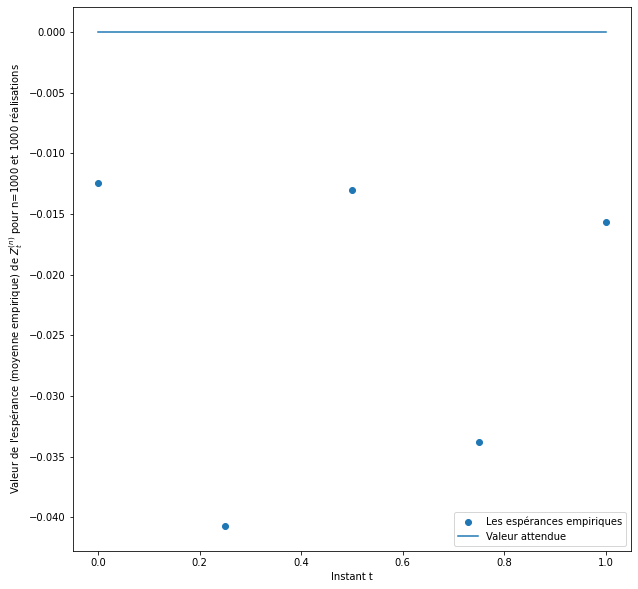

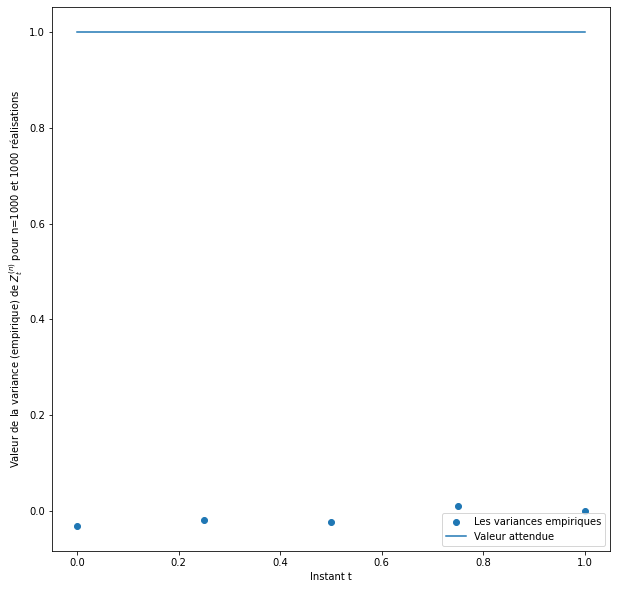

In [113]:
#Question 2 suite :
T=np.array([0,0.25,0.5,0.75,1])

n=1000 #Quel Z_til_n on calcule
repetition=1000 #Combien de fois


def esperance_Z_tilde(T,repetition,n):
    Moy=np.zeros( (T.shape[0],))
    for k in range(T.shape[0]): #On début j'avais fait une boucle sur les répétitions ou je passais en argument de Z_til T. Plus lent.
        Temps=np.full( (repetition,), T[k] )
        Moy[k]=Z_til(n,Temps).sum()/repetition

    plt.figure(figsize=(10,10))
    plt.scatter(T,Moy,label="Les espérances empiriques")
    plt.plot(T,np.full( T.shape, 0), label="Valeur attendue")
    plt.legend()
    plt.xlabel("Instant t")
    plt.ylabel(f"Valeur de l'espérance (moyenne empirique) de $ Z^{{(n)}}_t$ pour n={n} et {repetition} réalisations")
    #Variance à faire

def variance_Z_tilde(T,repetition,n):
    Var=np.zeros( (T.shape[0],))
    for k in range(T.shape[0]): #On début j'avais fait une boucle sur les répétitions ou je passais en argument de Z_til T. Plus lent.
        Temps=np.full( (repetition,), T[k] )
        Z_simu=Z_til(n,Temps)
        Var[k]=((Z_simu**2).sum()-(Z_simu.sum())**2)/repetition
    plt.figure(figsize=(10,10))
    plt.scatter(T,Moy,label="Les variances empiriques")
    plt.plot(T,np.full( T.shape, 1), label="Valeur attendue")
    plt.legend()
    plt.xlabel("Instant t")
    plt.ylabel(f"Valeur de la variance (empirique) de $ Z^{{(n)}}_t$ pour n={n} et {repetition} réalisations")

esperance_Z_tilde(T,repetition,n)   
variance_Z_tilde(T,repetition,n) #BIZARRE



(5, 1000)
Ca marche plutôt bien. Pour 10000 répétitions ça prend peu de temps et ça marche encore mieux.


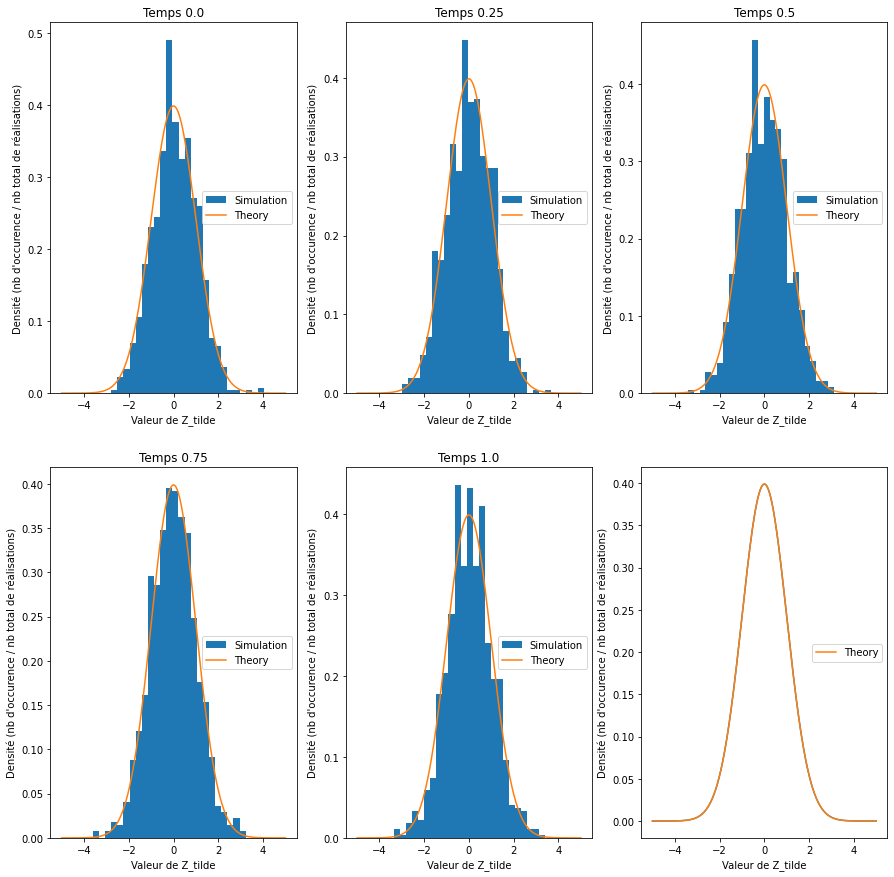

In [114]:
#Tracé des histogrammes, avec density true pour comparer les densités. (si même densité, même fonction de répartition donc Cv en loi)
n=1000
repetition=1000
Z_tot_til=np.array([Z_til(n,np.full( (repetition,) ,T[k] ) ) for k in range(T.shape[0])])
print(Z_tot_til.shape)


taille=5
fig,axes=plt.subplots( 2,3,figsize=(taille*3,taille*3) )
axes[0,0].hist(Z_tot_til[0,:],bins=25,density=True,label="Simulation")
axes[0,1].hist(Z_tot_til[1,:],bins=25,density=True,label="Simulation")
axes[0,2].hist(Z_tot_til[2,:],bins=25,density=True,label="Simulation")
axes[1,0].hist(Z_tot_til[3,:],bins=25,density=True,label="Simulation")
axes[1,1].hist(Z_tot_til[4,:],bins=25,density=True,label="Simulation")

x = np. linspace (-5,5,1000)
f_x = sps.norm.pdf(x)
for i in range(2):
    for j in range(3):
        if i+j==3: #Dernier cas où on print rien.
            axes[i,j].plot(x,f_x)  
        elif i==0:
            axes[i,j].set_title(f"Temps {T[i+j]}")
        else:
            axes[i,j].set_title(f"Temps {T[3+j]}")
        axes[i,j].plot(x,f_x,label="Theory")
        axes[i,j].set_xlabel("Valeur de Z_tilde")
        axes[i,j].set_ylabel("Densité (nb d'occurence / nb total de réalisations)")
        axes[i,j].legend(loc="right");
print("Ca marche plutôt bien. Pour 10000 répétitions ça prend peu de temps et ça marche encore mieux.")

3. Montrer que $\frac12\mathbb{E}\left((\tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h})^2\right) =  a h$ pour $h>0$ et tel que $t+h \leq 1$, pour une constante $a$ à déterminer.

4. Le vérifier expérimentalement en calculant $\frac1{2\text{card}\{(i,j),|t_i-t_j|=h\}}\sum_{|t_i-t_j|=h}(\tilde{Z}^{n}_{t_i} - \tilde{Z}^{n}_{t_j})^2$, où $\text{card}\{(i,j),|t_i-t_j|=h\}$ représente le nombre de couples $(t_i,t_j)$ distants de $h$, pour $h \in \{0.001,0.002,\ldots,0.3\}$. Représenter graphiquement cette quantité.

**Question 3 :**
$
\begin{align}
\mathbb{E}\left((\tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h})^2\right) & =\mathbb{E}\left( (\tilde{Z}^{(n)}_t)^2 \right) +  \mathbb{E} \left( (\tilde{Z}^{(n)}_{t+h})^2\right) -2 \mathbb{E}\left( \tilde{Z}^{(n)}_t\tilde{Z}^{(n)}_{t+h}\right) \\
&= 2 + \frac{1}{n} \sum_{i \neq j} 0 + \frac{1}{n} \sum_{i=0}^n \mathbb{E}(X_i^2) \left(  \underbrace{\mathbb{E}(1_{[0,U_i]}(t)1_{[0,U_i]}(t+h))}_{=1-t-h} - \underbrace{\mathbb{E}(1_{[0,U_i]}(t) 1_{]U_i,1]}(t+h))}_{=h} - \underbrace{\mathbb{E}(1_{]U_i,1]}(t) 1_{[0,U_i]}(t+h))}_{=0} +  \underbrace{\mathbb{E}(1_{]U_i,1]}(t)1_{]U_i,1]}(t+h))}_{=t} \right) \\
\end{align} $
D'où : $\frac12\mathbb{E}\left((\tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h})^2\right) = 2h$

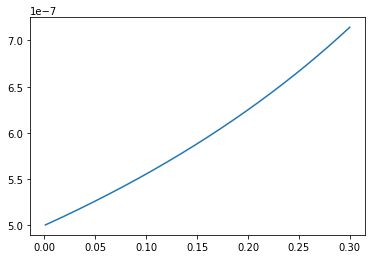

In [158]:
#Question 4 :

H=np.arange(0.001,0.301,0.001)
#N fixé
n=1000
#Calcul du cardinal : Assez long comme fonction.
#On simule la variable avant afin d'éviter les soucis de temps. Puis en plus c'est plus logique peut être

T=np.array([i/n for i in range(1,n+1)])
Z_tot_ti=Z(n,T)

def card(n,H,Z_tot_ti): #Prend environ 1min à tourner
    compteur=np.zeros( (H.shape[0]))
    somme=np.zeros( (H.shape[0]))
    for i in range(1,n+1):
        for j in range(1,i): #On coupe la somme en deux du à la symétrie grâce à la valeur absolue.
            #print(i)
            tab=np.isclose(abs(i-j),n*H)
            somme1=somme[tab]
            somme[tab]=somme1+ 2*(Z_tot_ti[i-1] - Z_tot_ti[j-1])**2
            #On simule 2 fois car on a que la moitié de la somme
            
            compteur1=compteur[tab]
            compteur[tab]=compteur1+1
    return(2*compteur,somme/(4*compteur))


plt.plot(H,card(n,H,Z_tot_ti)[1])

#BIZARRE

5. Décrire les différences et les similarités entre les deux approches.

**Question 5 :**
A faire

# Génération de texture

L'algorithme précédent présente la propriété d'être aisément généralisable aux dimensions supérieures, contrairement au premier. Nous allons maintenant construire pas à pas un algorithme pour simuler selon ce modèle sur le domaine $[-1, 1]^2$. Comme dans le cas 1D, on va procéder par séparations aléatoires du domaine. Pour ce faire, nous allons simuler des droites aléatoires, avec la paramétrisation suivante :
$$x \cos(\alpha) + y \sin(\alpha) = p,$$
où $x,y \in [0,1]$ sont les coordonnées, $\alpha \sim \mathcal{U}_{[0,\pi]}$ est la variable d'*orientation*, $p \sim \mathcal{U}_{[-\sqrt{2},\sqrt{2}]}$ est la variable de *position*.

On peut ainsi écrire la version 2D de $\tilde{Z}$ de la manière suivante :
$$\tilde{Z}^{(n)}_{(x,y)} = \frac{1}{\sqrt{n}}\sum_{i=1}^n X_i (1_{\{x \cos(\alpha) + y \sin(\alpha) \leq p\}}-1_{\{x \cos(\alpha) + y \sin(\alpha) > p\}})$$

1. Représenter 10 droites aléatoires sur le domaine $[-1, 1]^2$.

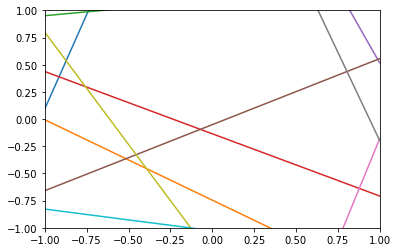

In [166]:
x=np.arange(-1,1.01,0.01)
y=np.arange(-1,1.01,0.01)

def droites(n,inter_max):
    
    return(sps.uniform.rvs(size=(n,))*pi #Méthode inversion A REDEMONTRER
    ,sps.uniform.rvs(size=(n,))*2*inter_max-inter_max)

for k in range(10):
    alpha=sps.uniform.rvs()*pi #Méthode inversion A REDEMONTRER
    p=sps.uniform.rvs()*2*np.sqrt(2)-np.sqrt(2)
    plt.plot(x, (p-x*np.cos(alpha))/np.sin(alpha))
    plt.xlim([-1,1])
    plt.ylim([-1,1])

2. L'étape suivante consiste à attribuer une valeur +1 ou -1 à chaque partie du domaine, délimitées par une droite aléatoire. Générer une droite aléatoire, puis assigner une valeur aléatoire +1 ou -1 en tous points d'une grille régulière de discrétisation du domaine $[-1,1]^2$ de dimensions 200x200 (voir **np.meshgrid** et **plt.pcolormesh**).

(200, 200)
(200, 200)


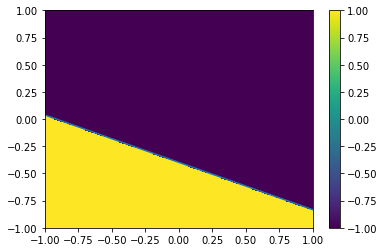

In [119]:
def géné_valeur(droites, x, y): #La droite est un tuple (alphas,ps ) de array avecles droites simulées pour chaque (x,y) et x y sont les tableaux sur lequels on meshgrid
#En sortie on a un tableau avec des +1 ou -1 de la taille du meshgrid.
    alphas,p_s=droitesd*
    xv,yv=np.meshgrid(x,x)
    valeur=np.full((xv.shape[0],xv.shape[1]),1 )
    valeur[ xv*np.cos(alphas) + yv*np.sin(alphas) > p_s]= -1
    return(valeur)

x=np.linspace(-1,1,200)

print(xv.shape)
print(yv.shape)
#plt.plot(xv,yv)
#Je génère ma droite
alpha=sps.uniform.rvs()*pi #Méthode inversion A REDEMONTRER
p=sps.uniform.rvs()*2*np.sqrt(2)-np.sqrt(2)
valeur=géné_valeur( (alpha,p), x, x)

plt.plot(x, (p-x*np.cos(alpha))/np.sin(alpha))
plt.xlim([-1,1])
plt.ylim([-1,1])

plt.pcolor(xv,yv,valeur)
plt.colorbar();





In [111]:
np.array([2,3])*np.array([1,2])

array([2, 6])

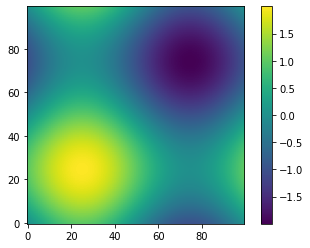

In [73]:
def sin2d(x,y):
    return np.sin(x) + np.sin(y)

yy,xx=np.meshgrid( np.linspace(0,2*np.pi,100),np.linspace(0,2*np.pi,100))
z=sin2d(xx,yy)
plt.imshow(z,origin='lower')

plt.colorbar()

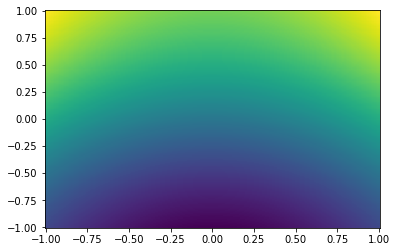

In [77]:
ys,xs=np.mgrid[-1:1:200j ,-1:1:200j]
density=np.sin(ys)-np.cos(xs)
plt.figure()
plt.pcolor(xs,ys,density)

3. Combiner les résultats des deux questions précédentes pour générer une réalisation de $\tilde{Z}$ sur $[-1,1]^2$ pour $n = 100, 1000$ et $10000$ sur la même grille de discrétisation. Commenter. 

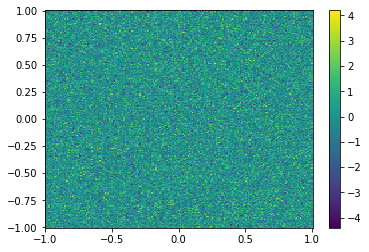

In [145]:
def Z_fin(x,y,n,inter_max): #Pourun couple (x,y) fixé, on a une droite, ie que dans la sommec'est toujours le même alpha et p, on ne regénère
    #pas à chaque fois. Fin c'est ce que j'ai compris.
    #On se dit que x,y sont des tableaux et on a en sorti un tableau de dim du meshgrid afin d'avoir une valeur de Z pour chaque noeud

    xv,yv=np.meshgrid(x,y)
    alphas, p_s=droites( x.shape[0]*y.shape[0], inter_max )
    alphas=np.reshape(alphas, (xv.shape[0],xv.shape[1]) )
    p_s=np.reshape(p_s, (xv.shape[0],xv.shape[1]) )
    final= np.zeros( (xv.shape[0],xv.shape[1]) )
    
    for k in range(n):
        Simu_Xi= changes=np.random.choice(np.array([-1,1]), size=(xv.shape[0],xv.shape[1]) ) #Ils sont différents pour chaque (x,y)
        final= final + Simu_Xi*géné_valeur( (alphas,p_s),x,y ) #Multiplication terme à terme des tableaux
    return(final/np.sqrt(n))

x=np.linspace(-1,1,200)
y=np.linspace(-1,1,200)
n=100 #Avec n=10000 ça prend environ 40s
plt.pcolor(x,y,Z_fin(x,y,n,np.sqrt(2)));
plt.colorbar();

    

4. Calculer $\frac1{2\text{card}\{(i,j),|t_i-t_j|=h\}}\sum_{|t_i-t_j|=h}(\tilde{Z}^{n}_{t_i} - \tilde{Z}^{n}_{t_j})^2$ pour $h \in \{0.001,0.002,\ldots,0.3\}$ le long des axes verticaux et horizontaux. Tracer le graphique correspondant. Commenter.

In [140]:
H=np.arange(0.001,0.301,0.001)
#On fait un lancé puis on somme tout.



5. Générer une réalisation de $\tilde{Z}$ sur $[-10,10]^2$. On prendra soin de modifier la loi des paramètres des droites aléatoires en conséquence. Commenter. 

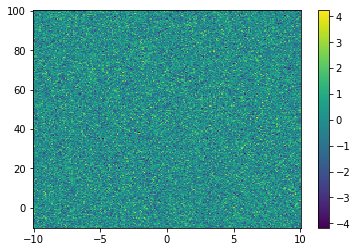

In [155]:
#Alpha ne change pas, seul p change. Et il ne faut donc pas le simuler pareil. 
def droite2(n, inter_max): #inter_max estdans quoi varie p au max
    return(sps.uniform.rvs(size=(n,))*pi #Méthode inversion A REDEMONTRER
    ,sps.uniform.rvs(size=(n,))*2*inter_max-inter_max)

inter_max=10*np.sqrt(3)
x1=np.linspace(-10,10,200)
y1=np.linspace(-10,100,200)
n=1000
plt.pcolor(x1,y1,Z_fin(x1,y1,n,inter_max));
plt.colorbar();

6. Une généralisation à deux dimensions d'une discrétisation du mouvement brownien standard peut être définie de la manière suivante : notant $(x_i,y_i)$ les coordonnées des points de la grille de discrétisation du domaine $[0,1]^2$, le vecteur formé des $Z_{(x_i,y_i)}$ est gaussien, centré et de covariance $\text{Cov} = \min(x_i,x_j) \times \min(y_i,y_j)$. Proposer et implémenter un algorithme de simulation de ce modèle sur une grille régulière de discrétisation du domaine $[0,1]^2$. Quelles difficultés rencontrez-vous ?